# Real-World Data Example

Here, we look at a new dataset and try to answer some questions about it.

The dataset contains data about sales at various liquor stores in the US state of Iowa.

We begin by viewing the dataset. 

In [1]:
import pandas as pd

In [36]:
df = pd.read_csv('data/liquor/iowa_liquor_sales.csv', index_col=0)

In [37]:
df.head()

,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S29198800001,11/20/2015,2191,Keokuk Spirits,1013 MAIN,KEOKUK,52632,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",56.0,Lee,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,6,$162.84,4.50,1.19
1,S29195400002,11/21/2015,2205,Ding's Honk And Holler,900 E WASHINGTON,CLARINDA,51632,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",73.0,Page,...,297,Templeton Rye w/Flask,6,750,$18.09,$27.14,12,$325.68,9.00,2.38
2,S29050300001,11/16/2015,3549,Quicker Liquor Store,1414 48TH ST,FORT MADISON,52627,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",56.0,Lee,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08
3,S28867700001,11/4/2015,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,IOWA CITY,52240,812 S 1ST AVE\nIOWA CITY 52240\n,52.0,Johnson,...,237,Knob Creek w/ Crystal Decanter,3,1750,$35.55,$53.34,3,$160.02,5.25,1.39
4,S29050800001,11/17/2015,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,TOLEDO,52342,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",86.0,Tama,...,249,Disaronno Amaretto Cavalli Mignon 3-50ml Pack,20,150,$6.40,$9.60,2,$19.20,0.30,0.08


In [38]:
df.dtypes

Invoice/Item Number       object
Date                      object
Store Number               int64
Store Name                object
Address                   object
City                      object
Zip Code                  object
Store Location            object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Vendor Name               object
Item Number                int64
Item Description          object
Pack                       int64
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

## Data cleaning and preparation
Before we can begin the analysis, we need to prepare our data. 
For our dataset here, this means making sure that any columns we need to use in calculations are in numeric format.

In [45]:
# removing dollar signs so that columns can be converted to numeric
df = df.replace('\$', '', regex=True)
# removing commas in 1000s
df = df.replace(',','', regex=True)

In [46]:
# making list of columns to switch to numeric format
columns_to_numeric = ['Sale (Dollars)', 'State Bottle Cost', 'State Bottle Retail']

for column in columns_to_numeric:
    df.loc[:, column] = pd.to_numeric(df.loc[:, column])

## Analysis Questions
Answer these questions using the pandas skills you've learned in the previous sections.
Keep in mind that there are often many ways to arrive at the same answer.

1) Which store had the highest total dollars of sales?
    - Is this the same store that had the highest volume (in liters) of alcohol sold?

Store with highest total dollar sales is: Hy-Vee #3 / BDI / Des Moines
Store with highest volume in liters is: Hy-Vee #3 / BDI / Des Moines


2) Which purchase (by Invoice Number) was the most expensive?
- What was the total cost of the invoice? (Use Sale (Dollars) column)

'S24494900001'

41042.64

3) What is the most expensive item? Use the average 'State Bottle Retail' to find this.
- How much does the bottle cost, on average?

In [101]:
bottles = df.groupby('Item Description').mean()
bottles.loc[:, 'State Bottle Retail'].idxmax()

'Cragganmore Distillers Edition 25YR HA'

420.0

4) What is the most commonly sold item?

'Black Velvet'

5) What day in 2015 was the most money made? (Across all stores)

Timestamp('2015-03-16 00:00:00')

6) Which zip code drinks the most? (in liters)

'52402'

7) Does the data set contain any null values?

True

8) What is the average state bottle cost?
    - Max cost?
    - Min cost?
    - 50%?

count    69999.000000
mean         9.453733
std          6.642000
min          0.000000
25%          5.480000
50%          7.870000
75%         11.540000
max        280.000000
Name: State Bottle Cost, dtype: float64

9) What is the total volume sold in Iowa City in 2013?

6097.08

10) Which month (average, across all years) sees the highest sales?

10

12) What is the most popular item (most bottles sold) at Wilkie Liquors?

'Juarez Gold Dss'

13) From which item does Wilkie Liquors earn the most of its revenue?

'Jack Daniels Old #7 Black Lbl'

14) What was the most expensive bottle sold in Des Moines in 2012?
- How much did it cost?

'Dt Lonach Glendarroch 1966 42yr'

153.0

15) Which store sold the most bottles of liquor in the city of Des Moines? (Over the entire time period for which we have data)

'Hy-Vee #3 / BDI / Des Moines'

16) Make a plot about at least one of these questions:

In [99]:
import matplotlib.pyplot as plt 

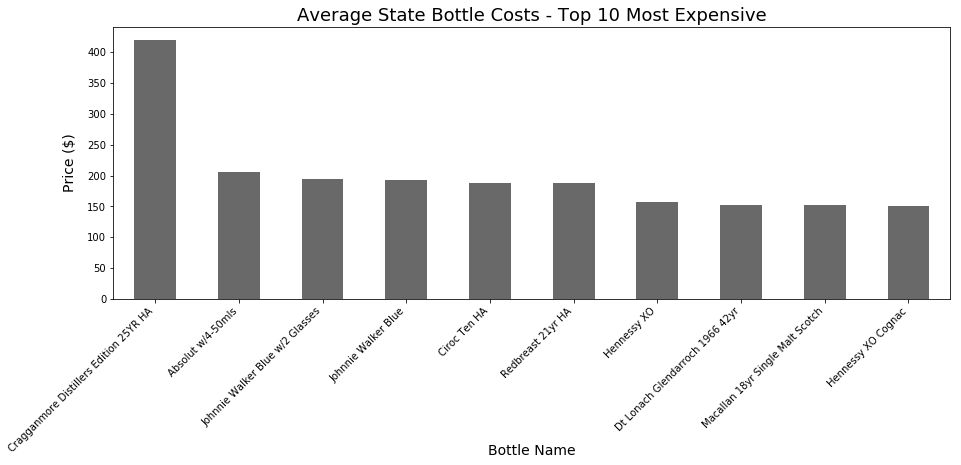